In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from proj1_helpers import *
from implementations import *

In [3]:
#Data loading
labels, raw_data, indices = load_csv_data('train.csv', sub_sample=False)
labels_te, raw_data_te, indices_te = load_csv_data('test.csv', sub_sample=False)

In [22]:
        # ----  DATA PREPROCESSING  ----

#Data division according to jets

print('Data processing...: Data division according to jets')
labels0, data0, labels1, data1, labels2, data2 = divide_data(labels, raw_data)
labels0_te, data0_te, labels1_te, data1_te, labels2_te, data2_te = divide_data(labels_te, raw_data_te)

print('Data processing...: Train:', '0 jet', data0.shape, ', 1 jet', data1.shape, ', 2 or more jets', data2.shape)
print('Data processing...: Test:', '0 jet', data0_te.shape, ', 1 jet', data1_te.shape, ', 2 or more jets', data2_te.shape)

#Remove features with variance 0

print('Data processing...: Remove features with null variance')
clean_data0, clean_data0_te,no_var_columns0 = remove_novar_features(data0, data0_te)
print('Data processing...: Columns of "0 jet" with variance = 0 :', no_var_columns0) 
print('Data processing...: New data shape "0 jet" :', clean_data0.shape) 
clean_data1, clean_data1_te,no_var_columns1 = remove_novar_features(data1, data1_te)
print('Data processing...: Columns of "1 jet" with variance = 0 :', no_var_columns1)
print('Data processing...: New data shape "1 jet" :', clean_data1.shape) 
clean_data2, clean_data2_te,no_var_columns2 = remove_novar_features(data2, data2_te)
print('Data processing...: Columns of "2 or more jets" with variance = 0 :', no_var_columns2) 
print('Data processing...: New data shape  "2 or more jets" :', clean_data2.shape) 

model = input("Which model (A, B, C or D) do you want to use? ")


#Data standardization


print('Data processing...: Data standardization')
std_data0, mean0, std0 = standardize_train(clean_data0, model) 
std_data0_te = standardize_test(clean_data0_te, mean0, std0, model)

std_data1, mean1, std1 = standardize_train(clean_data1, model)
std_data1_te = standardize_test(clean_data1_te, mean1, std1, model)

std_data2, mean2, std2 = standardize_train(clean_data2, model)
std_data2_te = standardize_test(clean_data2_te, mean2, std2, model)


#Column 0 estimation or not

if (model == A or model == C):
    print('Data processing...: Estimation of column 0 using least squares')
    estimated_data0, weights_train0 = column_estimation_train(std_data0)
    estimated_data0_te = column_estimation_test(std_data0_te, weights_train0)

    estimated_data1, weights_train1 = column_estimation_train(std_data1)
    estimated_data1_te = column_estimation_test(std_data1_te, weights_train1)

    estimated_data2, weights_train2 = column_estimation_train(std_data2)
    estimated_data2_te = column_estimation_test(std_data2_te, weights_train2)

if (model == B or model == D):
    print('Data processing...: No column 0 estimation')
    estimated_data0 = std_data0
    estimated_data0_te = std_data0_te
    
    estimated_data1 = std_data1
    estimated_data1_te = std_data1_te
    
    estimated_data1 = std_data0
    estimated_data1_te = std_data1_te

Train: 0 jet (99913, 30) , 1 jet (77544, 30) , 2 or more jets (72543, 30)
Test: 0 jet (227458, 30) , 1 jet (175338, 30) , 2 or more jets (165442, 30)
Columns with variance = 0 : (array([ 4,  5,  6, 12, 22, 23, 24, 25, 26, 27, 28, 29]),)
New data shape : (99913, 18)
Columns with variance = 0 : (array([ 4,  5,  6, 12, 22, 26, 27, 28]),)
New data shape : (77544, 22)
Columns with variance = 0 : (array([], dtype=int64),)
New data shape : (72543, 30)
26123 NaN lines found
7562 NaN lines found
4429 NaN lines found
0 jet: Highly correlated indices [5, 2]
1 jet: Highly correlated indices [21, 18, 2]
2 or more jets: Highly correlated indices [29, 21, 2]


In [27]:
        # ----  RIDGE REGRESSION  ----

if (model == A or model == B):
    #Define parameters
    degrees = [9,10,11,12,13]
    lambdas = np.logspace(-1, -5, 5)
    k_fold = 10
    seed = 23

    #Find best parameters (cross validation)
    print('Ridge regression... : Finding best parameters with cross validation...')
    best_degree0, best_lambda0, best_score0, _ = find_best_parameters_general(labels0, estimated_data0, k_fold, seed, lambdas=lambdas, degrees=degrees)
    print('Ridge regression... : 0 jet:', 'Best degree:', best_degree0, 'Best lambda:', best_lambda0, 'Best score:', best_score0)

    best_degree1, best_lambda1,  best_score1, _ = find_best_parameters_general(labels1, estimated_data1, k_fold, seed, lambdas=lambdas, degrees=degrees)
    print('Ridge regression... : 1 jet:', 'Best degree:', best_degree1, 'Best lambda:', best_lambda1, 'Best score:', best_score1)

    best_degree2, best_lambda2, best_score2, _ = find_best_parameters_general(labels2, estimated_data2, k_fold, seed, lambdas=lambdas, degrees=degrees)
    print('Ridge regression... : 2 or more jets:', 'Best degree:', best_degree2, 'Best lambda:', best_lambda2, 'Best score:', best_score2)

0 jet: Best degree: 1 Best lambda: 0.1 Best score: 0.8138424582123911


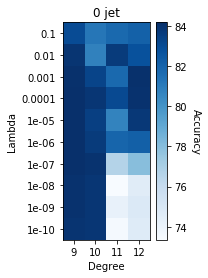

<Figure size 432x288 with 0 Axes>

In [108]:
fig, ax = plt.subplots()
im = ax.imshow((scores0.T*100), cmap='Blues')
clb = ax.figure.colorbar(im, fraction=0.05, pad=0.02)
clb.set_label('Accuracy', rotation=-90, va="bottom")
ax.set_xticks(np.arange(scores0.shape[0]))
ax.set_yticks(np.arange(scores0.shape[1]))
ax.set_xticklabels(degrees)
ax.set_yticklabels(lambdas)
ax.set_xlabel('Degree')
ax.set_ylabel('Lambda')
plt.title('0 jet')
plt.show()
plt.savefig('color_jet0.png')

#plt.plot(degrees, np.mean(scores0, axis = 1), label = '0 jet')
#plt.plot(degrees, np.mean(scores1, axis = 1), label = '1 jet')
#plt.plot(degrees, np.mean(scores2, axis = 1), label = '2 or more jets')
#plt.ylabel('Accuracy')
#plt.xlabel('Degree')
#plt.legend()
#plt.show
#plt.savefig('plot.png')

In [ ]:
#Prediction making
y_pred0 = make_predictions(estimated_data0, labels0, estimated_data0_te, best_lambda0, best_degree0)
y_pred1 = make_predictions(estimated_data1, labels1, estimated_data1_te, best_lambda1, best_degree1)
y_pred2 = make_predictions(estimated_data2, labels2, estimated_data2_te, best_lambda2, best_degree0)

#Submission making
labels_te[np.where(raw_data_te[:,22] == 0)[0]] = y_pred0
labels_te[np.where(raw_data_te[:,22] == 1)[0]] = y_pred1
labels_te[np.where(raw_data_te[:,22] > 1)[0]] = y_pred2

create_csv_submission(indices_te, labels_te, 'test_jet.csv')

In [40]:
        # ----  LOGISTIC REGRESSION  ----

if (model == C or model == D):
    #Labels conversion to binary values

    labels0[labels0 == -1] = 0
    labels1[labels1 == -1] = 0
    labels2[labels2 == -1] = 0

    #Define parameters

    degrees = range(5)
    lambdas = np.logspace(-1, -5, 5)
    k_fold = 10
    gamma = 1e-5

    #Find best parameters (cross validation)

    print('Logistic regression...: Finding best parameters with cross validation...')
    best_degree0, best_lambda0, best_score0, _ = find_best_parameters_general(labels0, estimated_data0, k_fold, seed, lambdas=lambdas, degrees=degrees, gamma=gamma)
    print('Logistic regression...: 0 jet:', 'Best degree:', best_degree0, 'Best lambda:', best_lambda0, 'Best score:', best_score0)

    best_degree1, best_lambda1, best_score1, _ = find_best_parameters_general(labels1, estimated_data1, k_fold, seed, lambdas=lambdas, gamma=gamma, degrees=degrees)
    print('Logistic regression...: 1 jet:', 'Best degree:', best_degree1, 'Best lambda:', best_lambda1, 'Best score:', best_score1)

    best_degree2, best_lambda2, best_score2, _ = find_best_parameters_general(labels2, estimated_data2, k_fold, seed, lambdas=lambdas, gamma=gamma, degrees=degrees)
    print('Logistic regression...: 2 or more jets:', 'Best degree:', best_degree2, 'Best lambda:', best_lambda2, 'Best score:', best_score2)

    #Prediction 

    max_iters = 1000
    y_pred0 = make_predictions_log(estimated_data0, labels0, estimated_data0_te, best_lambda0, best_degree0, max_iters, gamma)
    y_pred1 = make_predictions_log(estimated_data1, labels1, estimated_data1_te, best_lambda1, best_degree1, max_iters, gamma)
    y_pred2 = make_predictions_log(estimated_data2, labels2, estimated_data2_te, best_lambda2, best_degree2, max_iters, gamma)

    #Submission 

    labels_te[np.where(raw_data_te[:,22] == 0)[0]] = y_pred0
    labels_te[np.where(raw_data_te[:,22] == 1)[0]] = y_pred1
    labels_te[np.where(raw_data_te[:,22] > 1)[0]] = y_pred2

    create_csv_submission(indices_te, labels_te, 'jet_log.csv')

jet0: Best degree: 3 Best lambda: 0.1 Best score: 0.7917826043439096


KeyboardInterrupt: 

In [ ]:
#Prediction making
y_pred0 = make_predictions_log(estimated_data0, labels0, estimated_data0_te, best_lambda0, best_degree0, max_iters, gamma)
y_pred1 = make_predictions_log(estimated_data1, labels1, estimated_data1_te, best_lambda1, best_degree1, max_iters, gamma)
y_pred2 = make_predictions_log(estimated_data2, labels2, estimated_data2_te, best_lambda2, best_degree2, max_iters, gamma)

#Submission making
labels_te[np.where(raw_data_te[:,22] == 0)[0]] = y_pred0
labels_te[np.where(raw_data_te[:,22] == 1)[0]] = y_pred1
labels_te[np.where(raw_data_te[:,22] > 1)[0]] = y_pred2

create_csv_submission(indices_te, labels_te, 'jet_log.csv')